In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.7MB 40kB/s 


In [ ]:
!nvidia-smi

Mon Jan 11 08:00:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.inceptionV3 import inceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Potato/Train'
valid_path = '/content/drive/MyDrive/Potato/Test'

In [3]:
# Import the inceptionV3 library as shown below and add preprocessing layer to the front of inceptionV3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Potato/Train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Potato/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 900 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Potato/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 300 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
29/29 [==============================] - 12s 422ms/step - loss: 0.1499 - accuracy: 0.9733 - val_loss: 0.3617 - val_accuracy: 0.9367
Epoch 2/15
29/29 [==============================] - 12s 420ms/step - loss: 0.1876 - accuracy: 0.9678 - val_loss: 0.7171 - val_accuracy: 0.9233
Epoch 3/15
29/29 [==============================] - 12s 415ms/step - loss: 0.1160 - accuracy: 0.9744 - val_loss: 0.5503 - val_accuracy: 0.9367
Epoch 4/15
29/29 [==============================] - 12s 419ms/step - loss: 0.0360 - accuracy: 0.9900 - val_loss: 0.3541 - val_accuracy: 0.9433
Epoch 5/15
29/29 [==============================] - 13s 434ms/step - loss: 0.0337 - accuracy: 0.9889 - val_loss: 0.5379 - val_accuracy: 0.9333
Epoch 6/15
29/29 [==============================] - 12s 417ms/step - loss: 0.1137 - accuracy: 0.9822 - val_loss: 0.7345 - val_accuracy: 0.9233
Epoch 7/15
29/29 [==============================] - 12s 417ms/step - loss: 0.6486 - accuracy: 0.9267 - val_loss: 0.9248 - val_accuracy: 0.9033

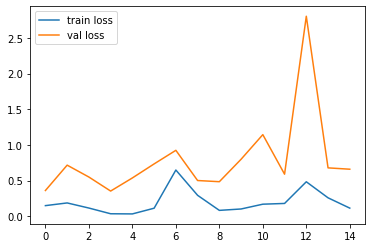

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


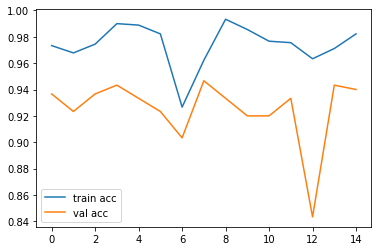

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
model.save('potatoinception.h5')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

nmodel=load_model('potatoinception.h5')

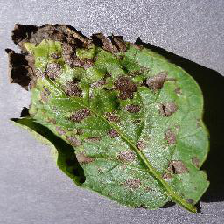

In [19]:
img=image.load_img('/content/drive/MyDrive/Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG',target_size=(224,224))
img

In [20]:
x=image.img_to_array(img)
x


array([[[184., 183., 197.],
        [191., 190., 204.],
        [195., 194., 208.],
        ...,
        [160., 159., 177.],
        [139., 138., 156.],
        [132., 131., 149.]],

       [[193., 192., 206.],
        [205., 204., 218.],
        [210., 209., 223.],
        ...,
        [158., 157., 175.],
        [143., 142., 160.],
        [146., 145., 163.]],

       [[181., 180., 194.],
        [188., 187., 201.],
        [191., 190., 204.],
        ...,
        [155., 154., 172.],
        [143., 142., 160.],
        [149., 148., 166.]],

       ...,

       [[162., 160., 174.],
        [163., 161., 175.],
        [162., 160., 174.],
        ...,
        [111., 107., 121.],
        [137., 133., 147.],
        [128., 124., 138.]],

       [[163., 161., 175.],
        [165., 163., 177.],
        [165., 163., 177.],
        ...,
        [145., 141., 155.],
        [135., 131., 145.],
        [136., 132., 146.]],

       [[172., 170., 184.],
        [172., 170., 184.],
        [173., 1

In [21]:
x=x/255
x

array([[[0.72156864, 0.7176471 , 0.77254903],
        [0.7490196 , 0.74509805, 0.8       ],
        [0.7647059 , 0.7607843 , 0.8156863 ],
        ...,
        [0.627451  , 0.62352943, 0.69411767],
        [0.54509807, 0.5411765 , 0.6117647 ],
        [0.5176471 , 0.5137255 , 0.58431375]],

       [[0.75686276, 0.7529412 , 0.80784315],
        [0.8039216 , 0.8       , 0.85490197],
        [0.8235294 , 0.81960785, 0.8745098 ],
        ...,
        [0.61960787, 0.6156863 , 0.6862745 ],
        [0.56078434, 0.5568628 , 0.627451  ],
        [0.57254905, 0.5686275 , 0.6392157 ]],

       [[0.70980394, 0.7058824 , 0.7607843 ],
        [0.7372549 , 0.73333335, 0.7882353 ],
        [0.7490196 , 0.74509805, 0.8       ],
        ...,
        [0.60784316, 0.6039216 , 0.6745098 ],
        [0.56078434, 0.5568628 , 0.627451  ],
        [0.58431375, 0.5803922 , 0.6509804 ]],

       ...,

       [[0.63529414, 0.627451  , 0.68235296],
        [0.6392157 , 0.6313726 , 0.6862745 ],
        [0.63529414, 0

In [22]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [23]:
model.predict(img_data)

array([[9.9998617e-01, 9.7561715e-06, 4.0910918e-06]], dtype=float32)

In [24]:
a=np.argmax(model.predict(img_data), axis=1)

In [25]:
a==0

array([ True])